# Data Science Project - Group 3

## Introduction

Understanding how students manage their spending can offer valuable insights into their lifestyle choices and financial habits. This project aims to explore the differences in spending patterns between hostelites (students living on campus) and day scholars (students commuting from home), focusing on their preferences for on-campus eateries. By analyzing how these groups allocate their budgets and interact with dining services, we hope to uncover trends that reflect their needs and preferences.  

Our goal is not just to identify popular eateries but also to understand how spending habits are influenced by a student’s residency status and monthly budget. The findings could help the university make informed decisions about dining services and support programs, ultimately improving the student experience.


## The Dataset

The goal of this dataset is to analyze the spending patterns and food choices of students on campus, with a focus on identifying key factors that influence their decisions. We surveyed university students through a google form, which was sent to all batches (this will help us assume we have gathered diverse data). Uptil now we have collected around 100+ responses from university sudents. The data we have collected focuses on categorical variables (day scholar/hostelite, eatery choice) and continuous variables (monthly budget)

### Features:  
- **Age**: Student's age.  
- **Gender**: Male, female, or other.  
- **Location**: Residency status (day scholar or hostelite).  
- **Monthly Budget**: Total monthly expenditure.  
- **Monthly Food Spending**: Amount spent on food each month.  
- **Primary Payment Method**: Parental support/self earned.  
- **Work Status**: Employment status (e.g., part-time, unemployed).  
- **Diet Preferences**: High protein/low carb/eat everything.  
- **Allergies**: Any food-related allergies.  
- **Frequency of Cooking**: How often students cook meals themselves.  
- **Frequency of Eating at Campus Eateries**: Visits to on-campus dining facilities.  
- **Satisfaction Levels**: Contentment with campus dining options.  
- **Preferences for Takeaways or Deliveries**: Inclination toward ordering food.  
- **Self-Rated Eating Habits**: How students perceive their eating patterns.  
- **Healthiness**: Self-assessed healthiness of eating choices.  

## Overview of the Data Collected

Before data cleaning, we explore the dataset to understand its structure, check for missing values, and identify key characteristics of the data.




In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sc
import re

In [2]:
#read the file
df = pd.read_csv("file.csv")

df.shape


(107, 32)

Lets first take a few snapshots of our data.

In [3]:
df.head(5)



,Timestamp,What is your age?,What is your gender?,Where do you live?,What is your monthly budget?,How much do you spend on food every month?,How do you primarily pay for your food?,Do you work on campus/outside?,Which specific diet plan do you follow?,Do you have any diet related allergies?,...,How often do you eat at Green Olive per week?,How often do you eat at Bunker per week?,How often do you eat at Baithak per week?,How often do you eat from outside of Lums per week?,On a scale 1 to 5 rate how satisfied you are with eating options at campus,Do you prefer takeaways or deliveries?,What time do you usually get Takeaways?,What time do you usually get Deliveries?,How would you describe your eating habits on a scale of 1 to 5,How would you describe how healthy you are on a scale of 1 to 5
0,17/10/2024 19:46:41,23,Male,Day scholar,"10,000 - 15,000","5,000 - 10,000",Parental/Family support,TAs,High Protein,No,...,Never,Never,Never,1-2 times per week,1,Takeaways,Dinner,"Dinner, Late night",3,3
1,17/10/2024 19:46:50,22,Female,Day scholar,"25,000 - 30,000","10,000 - 15,000",Parental/Family support,TAs,I eat everything,No,...,sometimes,Never,3-4 times per week,5-6 times per week,4,Deliveries,Early Dinner,"Early Dinner, Dinner",1,3
2,17/10/2024 19:49:03,22,Female,Day scholar,"15,000 - 20,000","10,000 - 15,000",Parental/Family support,TAs,I eat everything,No,...,Never,Never,1-2 times per week,1-2 times per week,4,Deliveries,"Lunch,",Late night,3,2
3,17/10/2024 19:49:17,22,Female,Hostelite but living in Lahore,"20,000 - 25,000","15,000 - 20,000",Earning from a job,Job/Freelance,I eat everything,No,...,1-2 times per week,Never,1-2 times per week,1-2 times per week,3,Deliveries,"Breakfast, Brunch, Lunch, Early Dinner, Dinner...","Breakfast, Brunch, Lunch, Early Dinner, Dinner...",2,2
4,17/10/2024 19:53:22,25,Female,Day scholar,"15,000 - 20,000","5,000 - 10,000",Parental/Family support,I don’t work,I eat everything,No,...,Never,Never,Never,Never,3,Deliveries,Lunch,Dinner,3,3


In [4]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Filter and display columns with missing values
missing_report = missing_values[missing_values > 0]

if not missing_report.empty:
    print("Columns with missing values:")
    print(missing_report)
else:
    print("No missing values in the DataFrame.")

Columns with missing values:
If you said Yes to above question, please specify which allergy.    101
dtype: int64


In [5]:
# Data types of each col
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
Timestamp                                                                     object
What is your age?                                                              int64
What is your gender?                                                          object
Where do you live?                                                            object
What is your monthly budget?                                                  object
How much do you spend on food every month?                                    object
How do you primarily pay for your food?                                       object
Do you work on campus/outside?                                                object
Which specific diet plan do you follow?                                       object
Do you have any diet related allergies?                                       object
If you said Yes to above question, please specify which allergy.              object
How often you cook your own meals in a

In [6]:
# Get all categorical columns (object type or explicitly set as categorical)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns[1:] #remove timestamp col from here


# Display unique values for each categorical column
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'What is your gender?': ['Male' 'Female' 'Prefer not to say']
Unique values in 'Where do you live?': ['Day scholar' 'Hostelite but living in Lahore' 'Hostelite']
Unique values in 'What is your monthly budget?': ['10,000 - 15,000' '25,000 - 30,000' '15,000 - 20,000' '20,000 - 25,000'
 '45,000 - 50,000' '5,000 - 10,000' '60000' '30,000 - 35,000'
 'less than 5000' '35,000 - 40, 000' '40,000 - 45,000' '60k']
Unique values in 'How much do you spend on food every month?': ['5,000 - 10,000' '10,000 - 15,000' '15,000 - 20,000' '2,000 - 5,000'
 'Almost all of it' '28000' '25000' '30000' '35000' '1000-2000' '25000+'
 '50000' '50k' '40k+' '32,000-35,000' '30-35k' '25-30k']
Unique values in 'How do you primarily pay for your food?': ['Parental/Family support' 'Earning from a job'
 'Parental/Family support, Financial Aid'
 'Parental/Family support, Earning from a job'
 'Personal Savings, Parental/Family support, Earning from a job'
 'Personal Savings' 'Personal Savings, Earning fro

### Some Observations

- Categorical Values
Columns with categorical data, such as "gender" (Male/Female/Other), contain values that require standardization. These values should be cleaned and mapped to numerical labels for easier analysis.

- Missing Values in Allergy Column
The "allergy_details" column contains missing or unspecified values. These need to be addressed.

- Long Column Names
Several column names are excessively long, contain spaces, or are in uppercase, making them difficult to work with. These need to be shortened, standardized, and converted to a consistent format.

- Range-Based Values in Budget and Spending Columns
Columns such as "monthly budget" and "food spending" contain range values (e.g., "10,000-15,000") or non-standard formats (e.g., "5000+"). These need to be cleaned and converted to a single numeric value, possibly through averaging.

- Multiple Selections in Categorical Columns
Some columns, like "payment method", allow multiple selections (e.g., "Parental Support, Financial Aid"). These need to be handled using techniques such as one-hot.

- Outliers and Ambiguous Categorical Frequency Data
Columns that record the frequency of visits to eateries, such as "PDC visits", currently contain categorical values with outliers and inconsistencies. These need to be cleaned.

## Data Cleaning

#### 1. Let's first rename all columns and make them shorter for consistency and clarity.


##### Renamed Columns Table

| Original Column Name                                                                 | New Column Name          |
|---------------------------------------------------------------------------------------|--------------------------|
| what_is_your_age?                                                                     | age                      |
| what_is_your_gender?                                                                  | gender                   |
| where_do_you_live?                                                                    | location                 |
| what_is_your_monthly_budget?                                                           | monthly_budget           |
| how_much_do_you_spend_on_food_every_month?                                             | food_spending            |
| how_do_you_primarily_pay_for_your_food?                                                | payment_method           |
| do_you_work_on_campus/outside?                                                        | work_location            |
| which_specific_diet_plan_do_you_follow?                                                | diet_plan                |
| do_you_have_any_diet_related_allergies?                                                | allergies                |
| if_you_said_yes_to_above_question,_please_specify_which_allergy.                      | allergy_details          |
| how_often_you_cook_your_own_meals_in_a_week?                                           | cook_frequency           |
| how_often_do_you_eat_at_pdc_per_week?                                                  | eat_at_pdc               |
| how_often_do_you_eat_at_baradari__per_week?                                            | eat_at_baradari          |
| how_often_do_you_eat_at_khokha__per_week?                                              | eat_at_khokha            |
| how_often_do_you_eat_at_superstore__per_week?                                          | eat_at_superstore        |
| how_often_do_you_eat_at_zakir_tikka__per_week?                                         | eat_at_zakir_tikka       |
| how_often_do_you_eat_at_juice_zone_per_week?                                           | eat_at_juice_zone        |
| how_often_do_you_eat_at_subway_per_week?                                               | eat_at_subway            |
| how_often_do_you_eat_at_chop_chop_per_week?                                            | eat_at_chop_chop         |
| how_often_do_you_eat_at_delish_per_week?                                               | eat_at_delish            |
| how_often_do_you_eat_at_jammin_per_week?                                               | eat_at_jammin            |
| how_often_do_you_eat_at_green_olive_per_week?                                          | eat_at_green_olive       |
| how_often_do_you_eat_at_bunker_per_week?                                               | eat_at_bunker            |
| how_often_do_you_eat_at_baithak_per_week?                                              | eat_at_baithak           |
| how_often_do_you_eat_from_outside_of_lums_per_week?                                    | eat_outside_lums         |
| on_a_scale_1_to_5_rate_how_satisfied_you_are_with_eating_options_at_campus            | campus_food_satisfaction |
| do_you_prefer_takeaways_or_deliveries?                                                 | takeaway_or_delivery     |
| what_time_do_you_usually_get_takeaways?                                                | takeaway_time            |
| what_time_do_you_usually_get_deliveries?                                               | delivery_time            |
| how_would_you_describe_your_eating_habits_on_a_scale_of_1_to_5                         |  health_rating|


In [7]:
print(df.columns)

Index(['Timestamp', 'What is your age?', 'What is your gender?',
       'Where do you live?', 'What is your monthly budget?',
       'How much do you spend on food every month?',
       'How do you primarily pay for your food?',
       'Do you work on campus/outside?',
       'Which specific diet plan do you follow?',
       'Do you have any diet related allergies?',
       'If you said Yes to above question, please specify which allergy.',
       'How often you cook your own meals in a week?',
       'How often do you eat at PDC per week?',
       'How often do you eat at Baradari  per week?',
       'How often do you eat at Khokha  per week?',
       'How often do you eat at Superstore  per week?',
       'How often do you eat at Zakir Tikka  per week?',
       'How often do you eat at Juice Zone per week?',
       'How often do you eat at Subway per week?',
       'How often do you eat at Chop Chop per week?',
       'How often do you eat at Delish per week?',
       'How often do y

In [8]:
# Renaming columns using a dictionary for clarity
column_renaming = {
    'Timestamp' : 'timestamp',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'Where do you live?': 'location',
    'What is your monthly budget?': 'monthly_budget',
    'How much do you spend on food every month?': 'food_spending',
    'How do you primarily pay for your food?': 'payment_method',
    'Do you work on campus/outside?': 'work_location',
    'Which specific diet plan do you follow?': 'diet_plan',
    'Do you have any diet related allergies?': 'allergies',
    'If you said Yes to above question, please specify which allergy.': 'allergy_details',
    'How often you cook your own meals in a week?': 'cook_frequency',
    'How often do you eat at PDC per week?': 'eat_at_pdc',
    'How often do you eat at Baradari  per week?': 'eat_at_baradari',
    'How often do you eat at Khokha  per week?': 'eat_at_khokha',
    'How often do you eat at Superstore  per week?': 'eat_at_superstore',
    'How often do you eat at Zakir Tikka  per week?': 'eat_at_zakir_tikka',
    'How often do you eat at Juice Zone per week?': 'eat_at_juice_zone',
    'How often do you eat at Subway per week?': 'eat_at_subway',
    'How often do you eat at Chop Chop per week?': 'eat_at_chop_chop',
    'How often do you eat at Delish per week?': 'eat_at_delish',
    'How often do you eat at Jammin per week?': 'eat_at_jammin',
    'How often do you eat at Green Olive per week?': 'eat_at_green_olive',
    'How often do you eat at Bunker per week?': 'eat_at_bunker',
    'How often do you eat at Baithak per week?': 'eat_at_baithak',
    'How often do you eat from outside of Lums per week?': 'eat_outside_lums',
    'On a scale 1 to 5 rate how satisfied you are with eating options at campus': 'campus_food_satisfaction',
    'Do you prefer takeaways or deliveries?': 'takeaway_or_delivery',
    'What time do you usually get Takeaways?  ': 'takeaway_time',
    'What time do you usually get Deliveries?  ': 'delivery_time',
    'How would you describe your eating habits on a scale of 1 to 5': 'eating_habit_rating',
    'How would you describe how healthy you are on a scale of 1 to 5': 'health_rating'
}



In [9]:
df.columns = df.columns.map(column_renaming)

In [10]:
df.head(2)

,timestamp,age,gender,location,monthly_budget,food_spending,payment_method,work_location,diet_plan,allergies,...,eat_at_green_olive,eat_at_bunker,eat_at_baithak,eat_outside_lums,campus_food_satisfaction,takeaway_or_delivery,takeaway_time,delivery_time,eating_habit_rating,health_rating
0,17/10/2024 19:46:41,23,Male,Day scholar,"10,000 - 15,000","5,000 - 10,000",Parental/Family support,TAs,High Protein,No,...,Never,Never,Never,1-2 times per week,1,Takeaways,Dinner,"Dinner, Late night",3,3
1,17/10/2024 19:46:50,22,Female,Day scholar,"25,000 - 30,000","10,000 - 15,000",Parental/Family support,TAs,I eat everything,No,...,sometimes,Never,3-4 times per week,5-6 times per week,4,Deliveries,Early Dinner,"Early Dinner, Dinner",1,3


#### 2. Let's remove the 'timestamp' column, as it is not relevant to the data we collected (it only indicates when participants completed the survey).

In [11]:
df = df.drop(columns=['timestamp'])

#### 3. Now let's deal with the first half of categorical value

We'll deal with the following col (gender,location,work_location , allergies). The following table describes mappings we have done

##### Categorical Columns and Their Mappings

| Column Name           | Description                                         | Mapped Values (Numeric)                                |
|-----------------------|-----------------------------------------------------|--------------------------------------------------------|
| **Gender**            | Gender of the respondent                           | 'Male' (1), 'Female' (2), 'Prefer not to say' (3)     |
| **Location**          | Type of accommodation or living situation          | 'Day scholar' (1), 'Hostelite but living in Lahore' (2), 'Hostelite' (3) |
| **Work Location**     | Work or job-related status at campus               | 'TAs' (1), 'Job/Freelance' (2), 'I don’t work' (3), 'Other jobs on campus' (4), 'RAs' (5) |
| **Diet Plan**         | The respondent’s diet plan preference              | 'High Protein' (1), 'I eat everything' (2), 'I eat everything except chicken' (3), 'Low carb' (4), 'Not any specific plan' (5), 'Gluten free' (6) |
| **Allergies**         | Whether the respondent has any diet-related allergies | 'No' (0), 'Yes' (1)                                     |




In [12]:
# List of columns I want to get unique values for
columns_of_interest = ['gender', 'location', 'payment_method','work_location','diet_plan','allergies']

# Create a dictionary to store unique values for each column
unique_values = {col: df[col].unique() for col in columns_of_interest}

# Print the unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'gender': ['Male' 'Female' 'Prefer not to say']
Unique values in 'location': ['Day scholar' 'Hostelite but living in Lahore' 'Hostelite']
Unique values in 'payment_method': ['Parental/Family support' 'Earning from a job'
 'Parental/Family support, Financial Aid'
 'Parental/Family support, Earning from a job'
 'Personal Savings, Parental/Family support, Earning from a job'
 'Personal Savings' 'Personal Savings, Earning from a job'
 'Personal Savings, Parental/Family support' 'My own business'
 'Personal Savings, Parental/Family support, Financial Aid, Earning from a job']
Unique values in 'work_location': ['TAs' 'Job/Freelance' 'I don’t work' 'Other jobs on campus' 'RAs']
Unique values in 'diet_plan': ['High Protein' 'I eat everything' 'I eat everything except chicken'
 'Low carb' 'Not any specific plan' 'Gluten free']
Unique values in 'allergies': ['No' 'Yes']


In [13]:
# 1. Create mappings for each categorical column
gender_mapping = {
    'Male': 1,
    'Female': 2,
    'Prefer not to say': 3
}

location_mapping = {
    'Day scholar': 1,
    'Hostelite but living in Lahore': 2,
    'Hostelite': 3
}

work_location_mapping = {
    'TAs': 1,
    'Job/Freelance': 2,
    'I don’t work': 3,
    'Other jobs on campus': 4,
    'RAs': 5
}

diet_plan_mapping = {
    'High Protein': 1,
    'I eat everything': 2,
    'I eat everything except chicken': 3,
    'Low carb': 4,
    'Not any specific plan': 5,
    'Gluten free': 6
}

allergies_mapping = {
    'No' : 0,
    'Yes' : 1
}

# Applying the mappings to the relevant columns
df['gender'] = df['gender'].map(gender_mapping)
df['location'] = df['location'].map(location_mapping)
df['work_location'] = df['work_location'].map(work_location_mapping)
df['diet_plan'] = df['diet_plan'].map(diet_plan_mapping)
df['allergies'] = df['allergies'].map(allergies_mapping)

#### 4. One hot encodings

In this step, we applied **one-hot encoding** to the categorical columns `payment_methods`,  `takeaway_time` and `delivery_time`, which contained multiple comma-separated values. In these questions participants were allowed to choose multiple options. One-hot encoding is a method used to convert categorical data into a format where all information is preserved in numerical way.

##### `payment_methods` col

In [14]:


# The unique options that you want to one-hot encode
options = ['Personal Savings', 'Parental/Family support', 'Financial Aid', 'Earning from a job', 'My own business']

# Create a one-hot encoded DataFrame with a prefix for each column name
for option in options:
    # Create a new column with a prefix, making column names lowercase, removing spaces and shortening names
    optimized_option = option.replace(' ', '_').lower().replace(',', '').replace('/', '_')
    df[f'pay_{optimized_option}'] = df['payment_method'].apply(lambda x: 1 if option in x else 0)

# Drop the original 'payment_method' column as we no longer need it
df.drop('payment_method', axis=1, inplace=True)




##### `takeaway_time` and `delivery_time` columns

Lets first see the unique strings present in this column. Here participants were allowed to select multiple options.

In [15]:
# List of columns I want to get unique values for
columns_of_interest = ['takeaway_time', 'delivery_time']

# Create a dictionary to store unique values for each column
unique_values = {col: df[col].unique() for col in columns_of_interest}

# Print the unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")


Unique values in 'takeaway_time': ['Dinner' 'Early Dinner' 'Lunch, '
 'Breakfast, Brunch, Lunch, Early Dinner, Dinner, Late night' 'Lunch'
 'Lunch, Dinner' 'Lunch, Early Dinner' 'Late night' 'Don’t '
 'Lunch, Early Dinner, Dinner' 'I dont get takeaways'
 'I don’t get takeaways' 'Brunch, Lunch, Early Dinner'
 "I don't do takeaways" 'Breakfast, Lunch' 'Early Dinner, Dinner'
 'Early Dinner, I don’t get takeaways' 'Early Dinner, Late night'
 'Lunch, Early Dinner, I don’t get takeaways' 'Lunch, Dinner, Late night'
 'Dinner, Late night' 'Breakfast' 'Early Dinner, Dinner, Late night'
 'Breakfast, Brunch, Lunch, Early Dinner, Dinner, Late night, I don’t get takeaways'
 'Brunch, Lunch' 'I dont' 'Breakfast, Early Dinner, Late night'
 'Breakfast, Dinner' 'Brunch, Dinner' 'Lunch, I don’t get takeaways']
Unique values in 'delivery_time': ['Dinner, Late night' 'Early Dinner, Dinner' 'Late night'
 'Breakfast, Brunch, Lunch, Early Dinner, Dinner, Late night' 'Dinner'
 'Lunch, Dinner' 'Lunch, Early Din

In [16]:
def get_unique_strings_from_list(value_list):
    unique_strings = set()  # To store unique strings
    for value in value_list:
        # Split each string by commas, strip spaces, and update the set
        unique_strings.update([val.strip() for val in value.split(',') if val.strip()])
    return unique_strings

# Get unique strings for each column
for col, values in unique_values.items():
    unique_strings = get_unique_strings_from_list(values)
    print(f"Unique values in '{col}': {unique_strings}")

Unique values in 'takeaway_time': {'Early Dinner', 'I dont get takeaways', 'I dont', 'Breakfast', 'I don’t get takeaways', 'Dinner', 'Don’t', "I don't do takeaways", 'Late night', 'Lunch', 'Brunch'}
Unique values in 'delivery_time': {'Early Dinner', 'tbh 5am is closer to early morning so yeah', 'Breakfast', 'Nahi kartay', 'Dinner', 'Not really', 'Late night', "Usually don't", 'Lunch', 'Nothing', "I don't bruh", 'Brunch'}


##### Standardization Map Description
The standardization_map is used to standardize variations of responses related to "takeaway preferences" in the dataset. Several responses indicate that participants do not use takeaways, often due to confusion with delivery options. Based on this assumption, the following mappings were applied to group similar responses under a common category:

- Variations such as "Don’t", "I dont get takeaways", "I don't do takeaways", "nahi", and others have been standardized to "No", indicating that the participant does not use takeaways.
- A few other responses, such as "Late night, tbh 5am is closer to early morning so yeah", were mapped to "Late night" based on the assumption that participants intended to indicate a time preference, not a takeaway preference.
- Some variations, like "Early Dinner, I don’t get takeaways", were mapped to "No" under the assumption that participants were confused between "takeaway" and "delivery" options, and intended to indicate no takeaway preference.

The goal of this standardization is to address the confusion where participants accidentally selected "takeaway" options, but correctly indicated their actual preferences (e.g., delivery) in subsequent column. By grouping these variations under consistent labels, we can ensure cleaner and more meaningful data analysis.

In [17]:
standardization_map = {
    # Variations of "don't get takeaways"
    "Don’t": "No",
    "Don’t ": "No",
    "I dont get takeaways": "No",
    "I don’t get takeaways": "No",
    "I dont": "No",
    "I don't do takeaways": "No",
    "Usually don't ": "No",
    "Not really": "No",
    "Nothing ": "No",
    'Nothing': "No",
    "I don't bruh": "No",
    "Nahi kartay": "No",
    "Late night, tbh 5am is closer to early morning so yeah" : "Late night",
    "Early Dinner, I don’t get takeaways" : "No",
    "Lunch, Early Dinner, I don’t get takeaways" : "No",
    "Breakfast, Brunch, Lunch, Early Dinner, Dinner, Late night, I don’t get takeaways" : "No",
    "Lunch, I don’t get takeaways": "No"
}
# Step 3: Function to standardize column values using the mapping
def standardize_column(df, column, mapping):
    df[column] = df[column].fillna('').replace(mapping)
    return df

# Apply the standardization to both columns
df = standardize_column(df, columns_of_interest[0], standardization_map)
df = standardize_column(df, columns_of_interest[1], standardization_map)

Now lets make one hot encodings

In [18]:
# List of columns I want to get unique values for
columns_of_interest = ['takeaway_time', 'delivery_time']

# Create a dictionary to store unique values for each column
unique_values = {col: df[col].unique() for col in columns_of_interest}

# # Print the unique values for each column
# for col, values in unique_values.items():
#     print(f"Unique values in '{col}': {values}")

def get_unique_strings_from_list(value_list):
    unique_strings = set()  # To store unique strings
    for value in value_list:
        # Split each string by commas, strip spaces, and update the set
        unique_strings.update([val.strip() for val in value.split(',') if val.strip()])
    return unique_strings

# # Get unique strings for each column
# for col, values in unique_values.items():
#     unique_strings = get_unique_strings_from_list(values)
#     print(f"Unique values in '{col}': {unique_strings}")

all_unique_times = set()

for col in columns_of_interest:
    unique_strings = get_unique_strings_from_list(df[col].dropna())  # Drop NaN values
    all_unique_times.update(unique_strings)

# convert col names to lowercase with '_'
def clean_column_name(name):
    return name.lower().replace(" ", "_")

# Step 2: Apply one-hot encoding based on the unique time slots
def one_hot_encode(df, column, unique_times):
    for time in unique_times:
        # Create a new binary column for each unique time slot
        df[f"{column}_{time}"] = df[column].fillna('').apply(lambda x: int(time in x))
    return df

# Step 3: Apply one-hot encoding to both 'takeaway_time' and 'delivery_time' columns
for col in columns_of_interest:
    df = one_hot_encode(df, col, all_unique_times)

# Show the updated DataFrame with one-hot encoded columns
df.head()

,age,gender,location,monthly_budget,food_spending,work_location,diet_plan,allergies,allergy_details,cook_frequency,...,takeaway_time_Late night,takeaway_time_Lunch,takeaway_time_Brunch,delivery_time_Early Dinner,delivery_time_No,delivery_time_Breakfast,delivery_time_Dinner,delivery_time_Late night,delivery_time_Lunch,delivery_time_Brunch
0,23,1,1,"10,000 - 15,000","5,000 - 10,000",1,1,0,NaN,Never,...,0,0,0,0,0,0,1,1,0,0
1,22,2,1,"25,000 - 30,000","10,000 - 15,000",1,2,0,NaN,Never,...,0,0,0,1,0,0,1,0,0,0
2,22,2,1,"15,000 - 20,000","10,000 - 15,000",1,2,0,NaN,1-2 times per week,...,0,1,0,0,0,0,0,1,0,0
3,22,2,2,"20,000 - 25,000","15,000 - 20,000",2,2,0,NaN,once or twice a month,...,1,1,1,1,0,1,1,1,1,1
4,25,2,1,"15,000 - 20,000","5,000 - 10,000",3,2,0,NaN,Never,...,0,1,0,0,0,0,1,0,0,0


In [19]:
# Clean column names after one-hot encoding
def clean_column_names(df):
    df.columns = [col.lower().replace(" ", "_") for col in df.columns]  # Apply lower and replace spaces
    return df


df = clean_column_names(df)

In [20]:
df.columns

Index(['age', 'gender', 'location', 'monthly_budget', 'food_spending',
       'work_location', 'diet_plan', 'allergies', 'allergy_details',
       'cook_frequency', 'eat_at_pdc', 'eat_at_baradari', 'eat_at_khokha',
       'eat_at_superstore', 'eat_at_zakir_tikka', 'eat_at_juice_zone',
       'eat_at_subway', 'eat_at_chop_chop', 'eat_at_delish', 'eat_at_jammin',
       'eat_at_green_olive', 'eat_at_bunker', 'eat_at_baithak',
       'eat_outside_lums', 'campus_food_satisfaction', 'takeaway_or_delivery',
       'takeaway_time', 'delivery_time', 'eating_habit_rating',
       'health_rating', 'pay_personal_savings', 'pay_parental_family_support',
       'pay_financial_aid', 'pay_earning_from_a_job', 'pay_my_own_business',
       'takeaway_time_early_dinner', 'takeaway_time_no',
       'takeaway_time_breakfast', 'takeaway_time_dinner',
       'takeaway_time_late_night', 'takeaway_time_lunch',
       'takeaway_time_brunch', 'delivery_time_early_dinner',
       'delivery_time_no', 'delivery_ti

In [21]:
# Drop the original 'takeaway_time' column if you no longer need it
df.drop('takeaway_time', axis=1, inplace=True)
df.drop('delivery_time', axis=1, inplace=True)

#### 5. Missing Values

We observed that the allergy_details column contains missing values, which is likely because most participants reported not having any allergies, as indicated in the allergies column. Since the allergy_details question was optional in the original survey, participants without allergies left this field blank.
to fill missing values we will replace missing values with 'no allergies'

In [22]:
df['allergy_details'] = df['allergy_details'].fillna('No allergies')

#### 6. Budgets and food spending

When we collected our survey data, we allowed participants options with range values (i.e 10,000-15,000)

In [23]:
# Function to clean and standardize each cell
def standardize_budget(value, budget=None):
    value = str(value).lower().replace(" ", "").replace(",", "")

    # Handling ranges like "10000-15000"
    if '-' in value:
        nums = re.findall(r'\d+', value)
        if nums:
            return (int(nums[0]) + int(nums[1])) / 2  # Average of the range

    # Handling values like "5000+" or "30k+" (assume "k" means thousand)
    elif "k" in value:
        return float(re.findall(r'\d+', value)[0]) * 1000

    elif "less" in value:
        return 5000  # for option 'less than 5000'

    elif "almost" in value or "all" in value:
        return budget  # Assign the full budget value

    # Handling single numeric values directly
    elif value.isdigit():
        return float(value)

    return None  # For any unhandled cases

# Apply function to both columns
df['monthly_budget'] = df['monthly_budget'].apply(standardize_budget)
df['food_spending'] = df['food_spending'].apply(standardize_budget)

# Drop rows with missing values in cleaned columns
df.dropna(subset=['monthly_budget', 'food_spending'], inplace=True)

# Display cleaned data
print(df[['monthly_budget', 'food_spending']].head())

   monthly_budget  food_spending
0         12500.0         7500.0
1         27500.0        12500.0
2         17500.0        12500.0
3         22500.0        17500.0
4         17500.0         7500.0


#### 7. Now let's deal with the columns describing visiting frequecy per eatery.

We made a function to categorise all the eating frequency data (in the form of text) into numerical values for a more structured form of analysis.
The function was applied to the following columns in the dataset:
- eat_at_pdc
- eat_at_baradari
- eat_at_khokha
- eat_at_superstore
- eat_at_zakir_tikka
- eat_at_juice_zone
- eat_at_subway
- eat_at_chop_chop
- eat_at_delish
- eat_at_jammin
- eat_at_green_olive
- eat_at_bunker
- eat_at_baithak
- eat_outside_lums

##### Textual Data and Their Mappings

| Frequency Description          | Encoded Value                               |
|-----------------------|--------------------------------------------------------|
| **Never**            | 0    |
| **"Once a month", "Once a semester", "rarely", "sometimes"** | 1 |
| **1-2 times a week**     | 2 |
| **3-4 times a week**         | 3 |
| **5-6 times a week**         | 4  |
| **7+ times aweek**         | 5  |


In [24]:

import re

# Define the categorize_frequency function
def categorize_frequency(phrase):
    phrase = phrase.lower().strip()

    if "never" in phrase:
        return 0

    match = re.search(r'(per week|in a week|week)', phrase)
    if match:
      number = re.search(r'\d+', phrase)
      if number:
        num = int(number.group(0))
        if num == 0:
          return 0
        elif num <= 2:
            return 2  # Treat 2 as 1-2 times per week
        elif num == 3 or num == 4:
            return 3  # Treat 3-4 times as 3-4 times per week
        elif num == 5 or num == 6:
            return 4  # Treat 5-6 times as 5-6 times per week
        elif num >= 7:
            return 5

    elif re.search(r'\bonce a (semester|month)\b|semester|rarely|sometimes|month|only', phrase):
        return 1

    return 0


#### Applying the function to all the columns in-place

In [25]:
columns_to_categorize = [
    'eat_at_pdc', 'eat_at_baradari', 'eat_at_khokha', 'eat_at_superstore',
    'eat_at_zakir_tikka', 'eat_at_juice_zone', 'eat_at_subway', 'eat_at_chop_chop',
    'eat_at_delish', 'eat_at_jammin', 'eat_at_green_olive', 'eat_at_bunker',
    'eat_at_baithak', 'eat_outside_lums', 'cook_frequency'
]

# Applying the categorize_frequency function to each column in the list
for column in columns_to_categorize:
    if isinstance(df[column].iloc[0], str):
        df[column] = df[column].apply(categorize_frequency)

In [26]:
print(df.head(5).to_string())

   age  gender  location  monthly_budget  food_spending  work_location  diet_plan  allergies allergy_details  cook_frequency  eat_at_pdc  eat_at_baradari  eat_at_khokha  eat_at_superstore  eat_at_zakir_tikka  eat_at_juice_zone  eat_at_subway  eat_at_chop_chop  eat_at_delish  eat_at_jammin  eat_at_green_olive  eat_at_bunker  eat_at_baithak  eat_outside_lums  campus_food_satisfaction takeaway_or_delivery  eating_habit_rating  health_rating  pay_personal_savings  pay_parental_family_support  pay_financial_aid  pay_earning_from_a_job  pay_my_own_business  takeaway_time_early_dinner  takeaway_time_no  takeaway_time_breakfast  takeaway_time_dinner  takeaway_time_late_night  takeaway_time_lunch  takeaway_time_brunch  delivery_time_early_dinner  delivery_time_no  delivery_time_breakfast  delivery_time_dinner  delivery_time_late_night  delivery_time_lunch  delivery_time_brunch
0   23       1         1         12500.0         7500.0              1          1          0    No allergies           

## EDA


### Monthly Budget vs Health conciousness

In [27]:
df.columns

Index(['age', 'gender', 'location', 'monthly_budget', 'food_spending',
       'work_location', 'diet_plan', 'allergies', 'allergy_details',
       'cook_frequency', 'eat_at_pdc', 'eat_at_baradari', 'eat_at_khokha',
       'eat_at_superstore', 'eat_at_zakir_tikka', 'eat_at_juice_zone',
       'eat_at_subway', 'eat_at_chop_chop', 'eat_at_delish', 'eat_at_jammin',
       'eat_at_green_olive', 'eat_at_bunker', 'eat_at_baithak',
       'eat_outside_lums', 'campus_food_satisfaction', 'takeaway_or_delivery',
       'eating_habit_rating', 'health_rating', 'pay_personal_savings',
       'pay_parental_family_support', 'pay_financial_aid',
       'pay_earning_from_a_job', 'pay_my_own_business',
       'takeaway_time_early_dinner', 'takeaway_time_no',
       'takeaway_time_breakfast', 'takeaway_time_dinner',
       'takeaway_time_late_night', 'takeaway_time_lunch',
       'takeaway_time_brunch', 'delivery_time_early_dinner',
       'delivery_time_no', 'delivery_time_breakfast', 'delivery_time_dinn

In [28]:
int_count = df['monthly_budget'].apply(lambda x: isinstance(x, float)).sum()
print(f"Number of integer values: {int_count}")

Number of integer values: 105


In [29]:
print(df.dtypes)

age                              int64
gender                           int64
location                         int64
monthly_budget                 float64
food_spending                  float64
work_location                    int64
diet_plan                        int64
allergies                        int64
allergy_details                 object
cook_frequency                   int64
eat_at_pdc                       int64
eat_at_baradari                  int64
eat_at_khokha                    int64
eat_at_superstore                int64
eat_at_zakir_tikka               int64
eat_at_juice_zone                int64
eat_at_subway                    int64
eat_at_chop_chop                 int64
eat_at_delish                    int64
eat_at_jammin                    int64
eat_at_green_olive               int64
eat_at_bunker                    int64
eat_at_baithak                   int64
eat_outside_lums                 int64
campus_food_satisfaction         int64
takeaway_or_delivery     

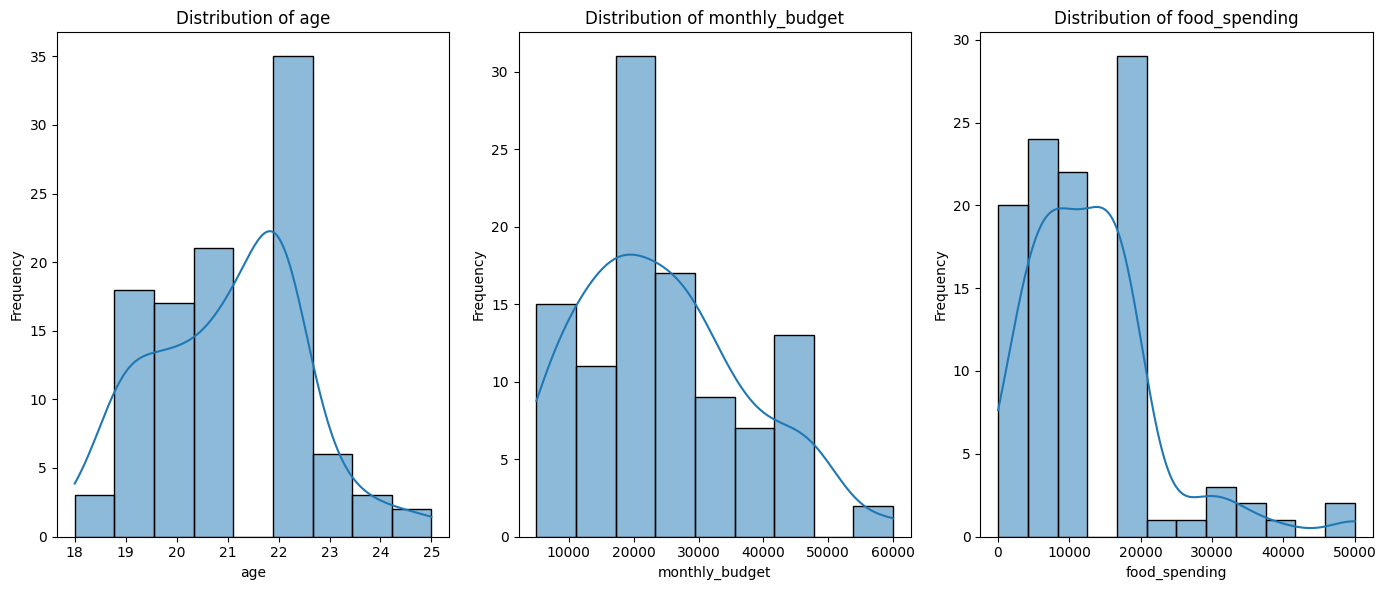

In [30]:
# Plotting histograms for numerical columns
numerical_columns = ['age', 'monthly_budget', 'food_spending']

plt.figure(figsize=(14, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\sehar\AppData\Local\Temp\ipykernel_2220\3996635484.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='monthly_budget', y='health_rating', data=df, ci=None)


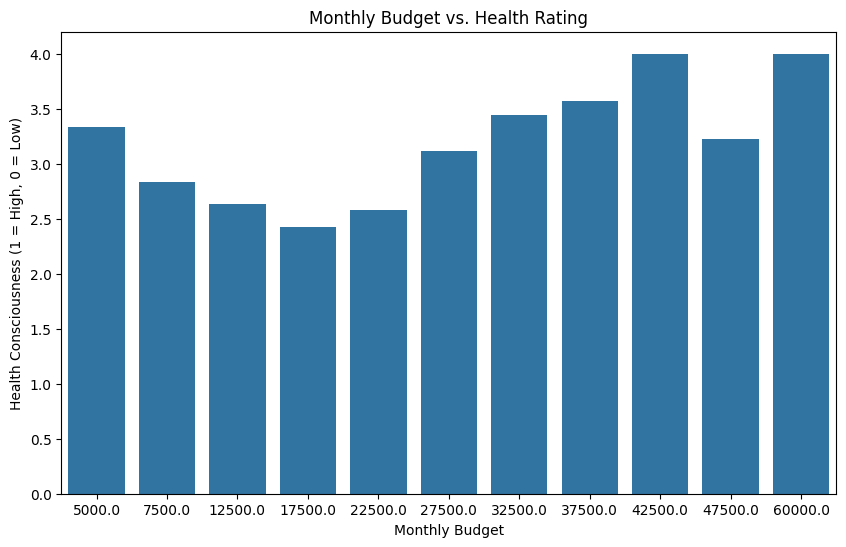

In [31]:
# Example bar plot for 'monthly_budget' vs 'health_rating'
plt.figure(figsize=(10, 6))
sns.barplot(x='monthly_budget', y='health_rating', data=df, ci=None)
plt.title('Monthly Budget vs. Health Rating')
plt.xlabel('Monthly Budget')
plt.ylabel('Health Consciousness (1 = High, 0 = Low)')
plt.show()

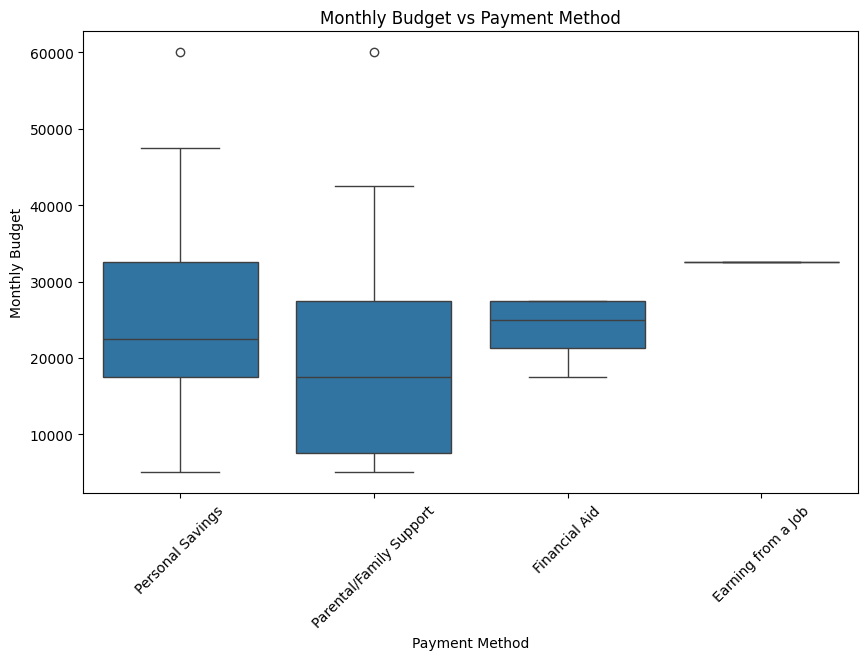

In [32]:


# Create a column to combine all payment methods into a single 'payment_method' column for plotting
payment_columns = ['pay_personal_savings', 'pay_parental_family_support', 'pay_financial_aid',
                   'pay_earning_from_a_job', 'pay_my_own_business']

# Sum the payment methods to check for the presence (1) or absence (0) of each method
df['payment_method'] = df[payment_columns].sum(axis=1)

# Map payment_method values for easy interpretation
payment_method_map = {
    0: 'No Payment Method',
    1: 'Personal Savings',
    2: 'Parental/Family Support',
    3: 'Financial Aid',
    4: 'Earning from a Job',
    5: 'My Own Business'
}

df['payment_method'] = df['payment_method'].map(payment_method_map)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_method', y='monthly_budget', data=df)
plt.title('Monthly Budget vs Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Monthly Budget')
plt.xticks(rotation=45)
plt.show()


In [33]:
df.columns

Index(['age', 'gender', 'location', 'monthly_budget', 'food_spending',
       'work_location', 'diet_plan', 'allergies', 'allergy_details',
       'cook_frequency', 'eat_at_pdc', 'eat_at_baradari', 'eat_at_khokha',
       'eat_at_superstore', 'eat_at_zakir_tikka', 'eat_at_juice_zone',
       'eat_at_subway', 'eat_at_chop_chop', 'eat_at_delish', 'eat_at_jammin',
       'eat_at_green_olive', 'eat_at_bunker', 'eat_at_baithak',
       'eat_outside_lums', 'campus_food_satisfaction', 'takeaway_or_delivery',
       'eating_habit_rating', 'health_rating', 'pay_personal_savings',
       'pay_parental_family_support', 'pay_financial_aid',
       'pay_earning_from_a_job', 'pay_my_own_business',
       'takeaway_time_early_dinner', 'takeaway_time_no',
       'takeaway_time_breakfast', 'takeaway_time_dinner',
       'takeaway_time_late_night', 'takeaway_time_lunch',
       'takeaway_time_brunch', 'delivery_time_early_dinner',
       'delivery_time_no', 'delivery_time_breakfast', 'delivery_time_dinn

C:\Users\sehar\AppData\Local\Temp\ipykernel_2220\3892947788.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_diet['diet_group'] = 'Yes Diet Plan'
C:\Users\sehar\AppData\Local\Temp\ipykernel_2220\3892947788.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_diet['diet_group'] = 'No Diet Plan'


C:\Users\sehar\AppData\Local\Temp\ipykernel_2220\3892947788.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No Allergies', 'Yes Allergies'])


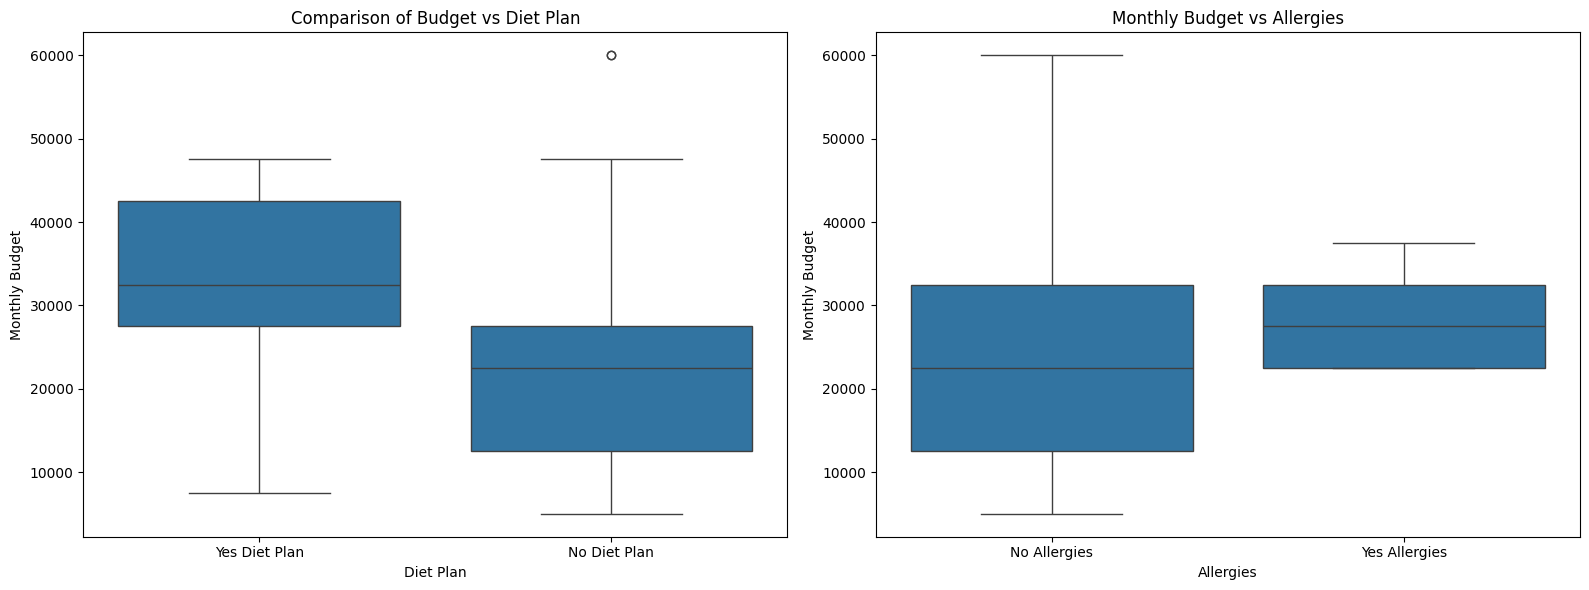

In [34]:
# Plot 1: Diet Plan vs Monthly Budget

# diet_plan_mapping = {
#     'High Protein': 1,
#     'I eat everything': 2,
#     'I eat everything except chicken': 3,
#     'Low carb': 4,
#     'Not any specific plan': 5,
#     'Gluten free': 6
# }


# Step 1: Create the filtered DataFrames
no_diet = df[df['diet_plan'] == 2]
yes_diet = df[df['diet_plan'].isin([1, 3, 4, 5, 6])]

# Step 2: Combine the two subsets into one DataFrame
yes_diet['diet_group'] = 'Yes Diet Plan'
no_diet['diet_group'] = 'No Diet Plan'

# Combine both DataFrames
combined_df = pd.concat([yes_diet, no_diet])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Budget vs Diet Plan
sns.boxplot(x='diet_group', y='monthly_budget', data=combined_df, ax=axes[0])
axes[0].set_title("Comparison of Budget vs Diet Plan")
axes[0].set_xlabel("Diet Plan")
axes[0].set_ylabel("Monthly Budget")

# Plot 2: Allergies vs Monthly Budget
sns.boxplot(x='allergies', y='monthly_budget', data=df, ax=axes[1])
axes[1].set_title('Monthly Budget vs Allergies')
axes[1].set_xlabel('Allergies')
axes[1].set_ylabel('Monthly Budget')
axes[1].set_xticklabels(['No Allergies', 'Yes Allergies'])

# Display the plots
plt.tight_layout()  # To make sure plots don't overlap
plt.show()

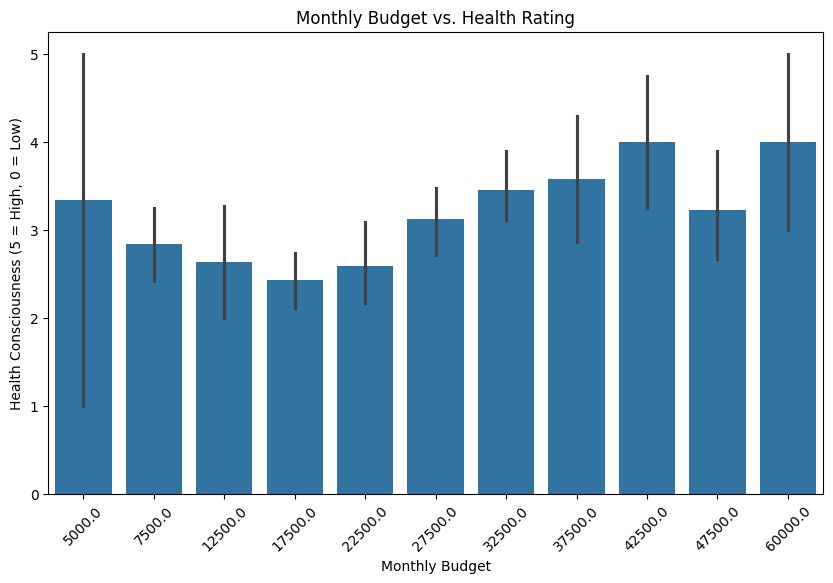

In [35]:
import matplotlib.pyplot as plt

# Create the bar plot for 'monthly_budget' vs 'health_rating'
plt.figure(figsize=(10, 6))
sns.barplot(x=df['monthly_budget'], y=df['health_rating'])

# Adding title and labels
plt.title('Monthly Budget vs. Health Rating')
plt.xlabel('Monthly Budget')
plt.ylabel('Health Consciousness (5 = High, 0 = Low)')
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [36]:
print(df['health_rating'])

0      3
1      3
2      2
3      2
4      3
      ..
102    3
103    1
104    2
105    2
106    3
Name: health_rating, Length: 105, dtype: int64


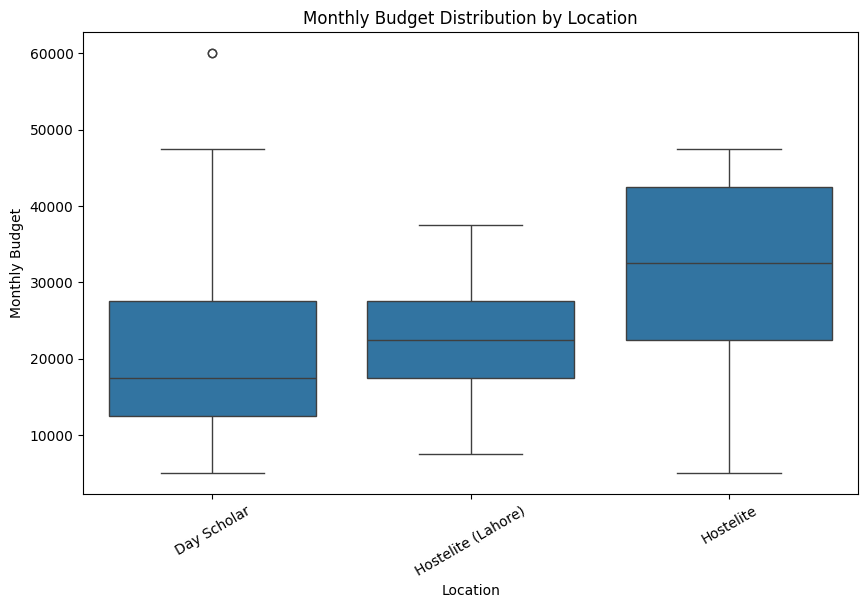

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='monthly_budget', data=df)

location_labels = ['Day Scholar', 'Hostelite (Lahore)', 'Hostelite']
plt.title('Monthly Budget Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Monthly Budget')
plt.xticks(rotation=30)
plt.xticks(ticks=[0, 1, 2], labels=location_labels)

plt.show()

## RQs 
- RQ 1: Do socioeconomic status play a role in students' eating habits
- RQ 2: Does health and specific dietry preferences affect spending budget


RQ 1

In [ ]:
import statsmodels.api as sm
df['high_budget'] = (df['monthly_budget'] > df['monthly_budget'].median()).astype(int)
treatment = df['high_budget']
outcome = df['eat_at_pdc']

# List of eatery-related outcome columns
eatery_columns = [
    'cook_frequency',
    'eat_at_pdc', 'eat_at_baradari', 'eat_at_khokha', 'eat_at_superstore',
    'eat_at_zakir_tikka', 'eat_at_juice_zone', 'eat_at_subway', 'eat_at_chop_chop',
    'eat_at_delish', 'eat_at_jammin', 'eat_at_green_olive', 'eat_at_bunker',
    'eat_at_baithak', 'eat_outside_lums'
]
#### WITHOUT COFOUNDING FACTORS
# Dictionary to store results
results = []

for column in eatery_columns:
    # Define outcome
    outcome = df[column]

    # Regression for each eatery
    X = sm.add_constant(df['high_budget'])
    model = sm.OLS(outcome, X).fit()

    # Store results
    results.append({
        'Eatery': column,
        'ATE': model.params['high_budget'],
        'P-value': model.pvalues['high_budget']
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)



                Eatery       ATE   P-value
0       cook_frequency -0.083333  0.749386
1           eat_at_pdc  0.364035  0.247113
2      eat_at_baradari  0.099781  0.661453
3        eat_at_khokha  0.371711  0.116461
4    eat_at_superstore -0.126096  0.662708
5   eat_at_zakir_tikka  0.895833  0.000147
6    eat_at_juice_zone  0.182018  0.177035
7        eat_at_subway  0.309211  0.144857
8     eat_at_chop_chop  0.001096  0.992897
9        eat_at_delish -0.110746  0.613034
10       eat_at_jammin  0.140351  0.548034
11  eat_at_green_olive -0.030702  0.888692
12       eat_at_bunker  0.081140  0.696368
13      eat_at_baithak  0.934211  0.001905
14    eat_outside_lums  0.951754  0.000138


In [ ]:
import statsmodels.formula.api as smf

# Define control variables WITH COFOUNDING VARS
control_vars = ['gender', 'work_location']
controls = ' + '.join(control_vars)

# List of eatery columns
eatery_columns = [
    'cook_frequency',
    'eat_at_pdc', 'eat_at_baradari', 'eat_at_khokha', 'eat_at_superstore',
    'eat_at_zakir_tikka', 'eat_at_juice_zone', 'eat_at_subway', 'eat_at_chop_chop',
    'eat_at_delish', 'eat_at_jammin', 'eat_at_green_olive', 'eat_at_bunker',
    'eat_at_baithak', 'eat_outside_lums'
]

# Dictionary to store results
results_rq1 = []

for column in eatery_columns:
    formula = f'{column} ~ high_budget + {controls}'
    model = smf.ols(formula=formula, data=df).fit()

    results_rq1.append({
        'Eatery': column,
        'ATE': model.params['high_budget'],
        'P-value': model.pvalues['high_budget']
    })

# Convert results to a DataFrame
results_rq1_df = pd.DataFrame(results_rq1)

# Display results
print(results_rq1_df)


                Eatery       ATE   P-value
0       cook_frequency -0.012674  0.961563
1           eat_at_pdc  0.267162  0.397199
2      eat_at_baradari  0.045818  0.841116
3        eat_at_khokha  0.298879  0.205767
4    eat_at_superstore -0.049799  0.864484
5   eat_at_zakir_tikka  0.805609  0.000524
6    eat_at_juice_zone  0.195849  0.149514
7        eat_at_subway  0.286072  0.177762
8     eat_at_chop_chop -0.007579  0.951974
9        eat_at_delish -0.086816  0.697465
10       eat_at_jammin  0.183290  0.440038
11  eat_at_green_olive -0.138480  0.518062
12       eat_at_bunker  0.111391  0.598501
13      eat_at_baithak  0.984462  0.001302
14    eat_outside_lums  0.894699  0.000371


THIS IS For Health wala RQ without cofounding vars

In [41]:
# Define treatments
df['on_diet'] = (df['diet_plan'] != 2).astype(int)  # Assuming 2 = "No specific diet"
df['has_allergies'] = df['allergies']  # Already binary (0 = No, 1 = Yes)

# Define outcome
outcome = df['food_spending']

# Regression to estimate ATE for both treatments
X_combined = sm.add_constant(df[['on_diet', 'has_allergies']])
model_combined = sm.OLS(outcome, X_combined).fit()

# Extract results
ate_diet = model_combined.params['on_diet']
p_value_diet = model_combined.pvalues['on_diet']

ate_allergies = model_combined.params['has_allergies']
p_value_allergies = model_combined.pvalues['has_allergies']

# Display results
print(f"Estimated ATE for Dietary Preferences: {ate_diet}")
print(f"P-value for Dietary Preferences Effect: {p_value_diet}")
print(f"Estimated ATE for Allergies: {ate_allergies}")
print(f"P-value for Allergies Effect: {p_value_allergies}")


Estimated ATE for Dietary Preferences: 6255.313620071693
P-value for Dietary Preferences Effect: 0.01135882541031995
Estimated ATE for Allergies: -2708.653405017922
P-value for Allergies Effect: 0.5201023739077941


With control variables

THIS IS For Health wala RQ

In [ ]:
import statsmodels.formula.api as smf

# Define control variables and outcome
control_vars = ['gender', 'work_location', 'age', 'monthly_budget', 'on_diet'] # control var
controls = ' + '.join(control_vars)

# Outcome: Food spending (or eating frequency at any eatery)
outcome = 'food_spending'

# Define the formula for the regression, incorporating the health rating and confounders
formula_health = f'{outcome} ~ health_rating + {controls}'

# Fit the regression model with cluster standard errors (e.g., by batch or group)
# Assuming 'batch' or similar grouping variable exists in the dataset
# If no grouping variable is available, we can skip the clustering and fit the model directly
model_health = smf.ols(formula=formula_health, data=df).fit(cov_type='cluster', cov_kwds={'groups': df['location']})

# Extract results
ate_health = model_health.params['health_rating']
p_value_health = model_health.pvalues['health_rating']

# Display results
print(f"Estimated ATE for Health Rating: {ate_health}")
print(f"P-value for Health Rating Effect: {p_value_health}")

# Display the model summary for detailed insights
print(model_health.summary())


Estimated ATE for Health Rating: -755.3441215843064
P-value for Health Rating Effect: 0.667955952643746
                            OLS Regression Results                            
Dep. Variable:          food_spending   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     3.086
Date:                Sun, 01 Dec 2024   Prob (F-statistic):              0.245
Time:                        20:11:59   Log-Likelihood:                -1081.1
No. Observations:                 105   AIC:                             2176.
Df Residuals:                      98   BIC:                             2195.
Df Model:                           6                                         
Covariance Type:              cluster                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

C:\Users\sehar\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 2
  warnings.warn('covariance of constraints does not have full '


ML

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Feature selection: Choosing relevant features for prediction
features = ['age', 'gender', 'monthly_budget', 'on_diet', 'work_location', 'diet_plan', 'health_rating']
X = df[features]  # Features
y = df['food_spending']  # Target variable (food spending)

# Data preprocessing
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables into dummy variables
X_scaled = StandardScaler().fit_transform(X)  # Scaling the features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict the food spending for test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Feature importance (What features matter the most in predicting food spending)
feature_importance = model.feature_importances_
features_list = X.columns
feature_importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


Mean Squared Error: 33446829.887265213
R-squared: 0.5871512985715778
          Feature  Importance
2  monthly_budget    0.490805
0             age    0.151453
6   health_rating    0.134196
5       diet_plan    0.077219
4   work_location    0.076589
1          gender    0.061214
3         on_diet    0.008524


PA4 code 

In [ ]:
# Write code here
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


feature_df_x =  df[[col for col in df.columns if col not in columns_to_exclude]]
target_df_y = df['price']

# Train-test splits
splits = [
    (0.9, 0.1),  # 90% train, 10% test
    (0.7, 0.3),  # 70% train, 30% test
    (0.5, 0.5)   # 50% train, 50% test
]

# Define models to evaluate
models = {
    'OLS (Linear Regression)': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Store RMSE results
results = {model: [] for model in models.keys()}

# Evaluate the models across different train-test splits
for train_size, test_size in splits:
    print(f"\nTraining with {int(train_size*100)}% Train, {int(test_size*100)}% Test split")

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(feature_df_x, target_df_y, train_size=train_size, random_state=42)

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[model_name].append(rmse)
        print(f"{model_name} RMSE: {rmse}")

# Print summary of results
print("\nSummary of RMSE across different splits:")
for model_name, rmse_list in results.items():
    print(f"{model_name} RMSE across splits: {rmse_list}")
    print(f"Average RMSE: {np.mean(rmse_list)}")
